In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
titanic_test=pd.read_csv(r"C:\Users\PRIYA\Desktop\DATASCIENCE\CASE STUDY\TITANIC\test.csv")

In [49]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
titanic_test.shape#here we have less rows compared to the train dataset

(418, 11)

In [51]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [52]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
#here cabin also has highest highest data we can delete it.
t22=titanic_test.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)

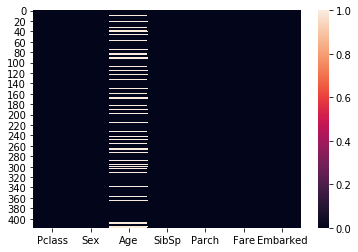

In [56]:
sns.heatmap(t22.isnull())

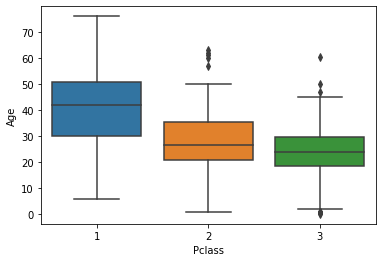

In [57]:
sns.boxplot(x='Pclass',y='Age',data=t22)

In [58]:
#here's there is a change in the percentile values.
#here also we will delete it.
t22=t22.dropna(subset=['Age'])

In [77]:
t22=t22.dropna(subset=["Fare"])

In [78]:
t22.shape

(331, 7)

In [79]:
#embarked , sex are categorical data need to convert it into numeric
print(t22['Sex'].unique())
print(t22['Embarked'].unique())

[1 0]
[1 2 0]


In [80]:
#also let's see the data set
t22.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [81]:
#counting starts from zero
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#encoding the sex column
t22.iloc[:,1]=labelencoder.fit_transform(t22.iloc[:,1].values)
#encoding the embarked column
t22.iloc[:,6]=labelencoder.fit_transform(t22.iloc[:,6].values)

In [82]:
print(t22['Sex'].unique())
print(t22['Embarked'].unique())

[1 0]
[1 2 0]


In [83]:
t22.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
5,3,1,14.0,0,0,9.2250,2
6,3,0,30.0,0,0,7.6292,1
7,2,1,26.0,1,1,29.0000,2
8,3,0,18.0,0,0,7.2292,0
9,3,1,21.0,2,0,24.1500,2


In [84]:
t22.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [86]:
t22.to_csv('test01.csv',index=False)